### Classification

In [1]:
import pandas as pd
import numpy as np
# 워닝 출력 방지
import warnings
warnings.filterwarnings('ignore')
# iris 데이터셋
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
iris['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [3]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
data = iris['data']
len(data)

150

In [10]:
type(data)

numpy.ndarray

In [6]:
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
# sepal : 꽃받침
# petal : 꽃잎
# iris 데이터는 꽃받침(길이,넓이), 꽃잎(길이,넓이) 총 4개의 속성(특징, 피쳐, 변수)
# 를 학습해서 품종(class)을 예측(분류)
# - sepal length in cm
# - sepal width in cm
# - petal length in cm
# - petal width in cm

In [11]:
# 품종
target = iris['target']
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
# 데이터프레임으로 생성
df = pd.DataFrame(data, columns=iris['feature_names'])
df['target'] = target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

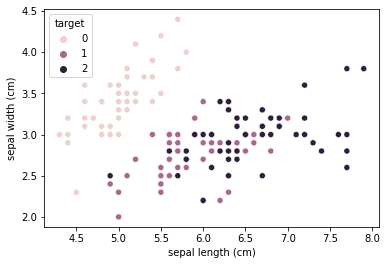

In [14]:
sns.scatterplot('sepal length (cm)','sepal width (cm)', data=df, hue='target')

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

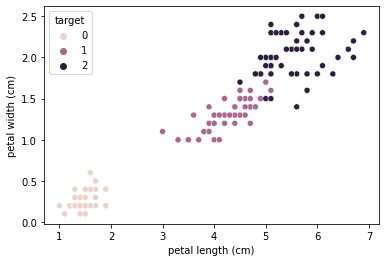

In [13]:
sns.scatterplot('petal length (cm)','petal width (cm)', data=df, hue='target')

In [15]:
# 데이터 분리 (학습용, 검증용)
from sklearn.model_selection import train_test_split

In [17]:
type(train_test_split(\
                    df.drop('target', axis=1), df['target'], random_state=32))

list

In [18]:
x_train, x_valid, y_train, y_valid = train_test_split(\
                    df.drop('target', axis=1), df['target'], random_state=32, test_size=0.25)

In [20]:
x_train.shape, y_train.shape

((112, 4), (112,))

In [21]:
x_valid.shape, y_valid.shape

((38, 4), (38,))

<AxesSubplot:xlabel='target', ylabel='count'>

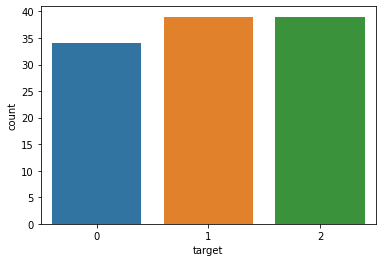

In [22]:
sns.countplot(y_train)

In [23]:
# target의 클래스의 분포를 균등하게 배분(stratify)
x_train, x_valid, y_train, y_valid = train_test_split(\
                    df.drop('target', axis=1), df['target'], random_state=32, stratify=df['target'])

<AxesSubplot:xlabel='target', ylabel='count'>

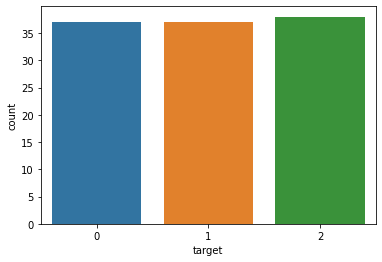

In [24]:
sns.countplot(y_train)

### Logistic Regression
* 이진분류 (두 개의 분류값)
* 독립변수들의 선형 결합을 이용해서 사건의 발생 가능 예측하는 통계기법
* 3개 이상의 분류인 경우
    * OvR (One vs Rest) : k개의 클래스 각각의 이진분류 확률로 구해서 총합을 통해 최종 판별

In [25]:
# import
from sklearn.linear_model import LogisticRegression

In [26]:
# 객체 생성
model = LogisticRegression()

In [23]:
# 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train2 = scaler.fit_transform(x_train)
x_valid2 = scaler.fit_transform(x_valid)

In [27]:
# 학습
model.fit(x_train, y_train)

LogisticRegression()

In [28]:
# 예측
pred = model.predict(x_valid)

In [26]:
pred, y_valid

(array([0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 1, 2, 1, 2, 1, 1, 0, 2, 2, 2, 2, 0,
        0, 0, 2, 1, 0, 2, 0, 2, 1, 1, 1, 2, 1, 2, 1, 0]),
 4      0
 120    2
 45     0
 3      0
 11     0
 91     1
 97     1
 9      0
 42     0
 94     1
 93     1
 147    2
 70     1
 144    2
 84     1
 67     1
 17     0
 118    2
 100    2
 104    2
 130    2
 25     0
 37     0
 1      0
 107    2
 99     1
 24     0
 132    2
 7      0
 117    2
 79     1
 54     1
 78     1
 135    2
 68     1
 131    2
 61     1
 19     0
 Name: target, dtype: int32)

In [29]:
(pred==y_valid).mean()

0.9736842105263158

In [28]:
(pred==y_valid).mean()

1.0

### SGD
* stochastic gradient descent
* 확률적 경사 하강법

In [29]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
pred = sgd.predict(x_valid)
(pred == y_valid).mean()

0.9473684210526315

### kNN
* k Nearest Neighbor
* 최근접 이웃

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(x_train, y_train)
pred = knc.predict(x_valid)
(pred == y_valid).mean()

0.9736842105263158

In [31]:
# n_neighbors 근접이웃 개수
# n_jobs CPU 사용개수(-1 : 전체)
for i in range(1,11):
    knc = KNeighborsClassifier(n_neighbors=i)
    knc.fit(x_train, y_train)
    pred = knc.predict(x_valid)
    print(i,(pred == y_valid).mean())

1 0.9736842105263158
2 0.9736842105263158
3 0.9736842105263158
4 0.9736842105263158
5 0.9736842105263158
6 0.9736842105263158
7 0.9473684210526315
8 0.9736842105263158
9 0.9736842105263158
10 0.9736842105263158


### SVM
* Support Vector Machine
* 이진분류(OvR 전략 사용)
* 경계선의 데이터 중 가장 큰 폭을 갖는 선

In [40]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
pred = svc.predict(x_valid)
(pred == y_valid).mean()

1.0

### Descision Tree
* 의사결정 나무
* CART

In [41]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_valid)
(pred == y_valid).mean()

0.9736842105263158

In [43]:
!pip install pydot

In [ ]:
# graphviz 설치
# Anaconda Powershell Prompt 실행
# conda install graphviz

In [49]:
from sklearn.tree import export_graphviz
from IPython.display import Image, display
import pydot
import io

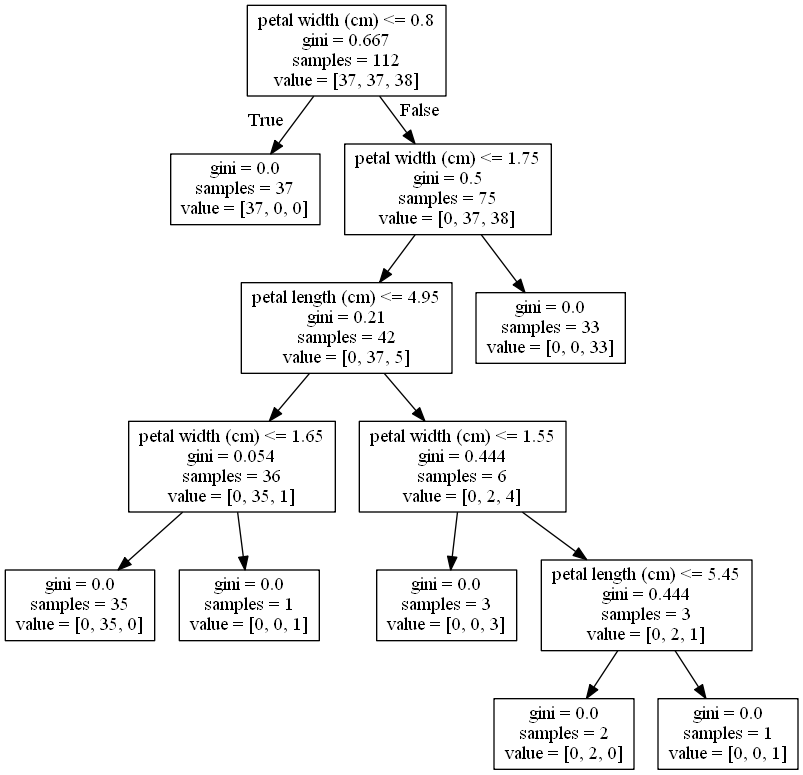

In [56]:
dot = io.StringIO()
export_graphviz(model, out_file=dot, feature_names=iris['feature_names'])
graph = pydot.graph_from_dot_data(dot.getvalue())[0]
image = graph.create_png()
Image(image)

* gini : 지니계수, 불순도, 엔트로피
* 엔트로피 : 클래스가 섞여있는 정도
* 엔트로피가 크다 -> 클래스가 혼잡하게 섞여 있다.

In [60]:
# max_depth : 최대깊이
# 트리의 가지치기(과적합 방지)
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)
pred = model.predict(x_valid)
(pred == y_valid).mean()

0.9736842105263158

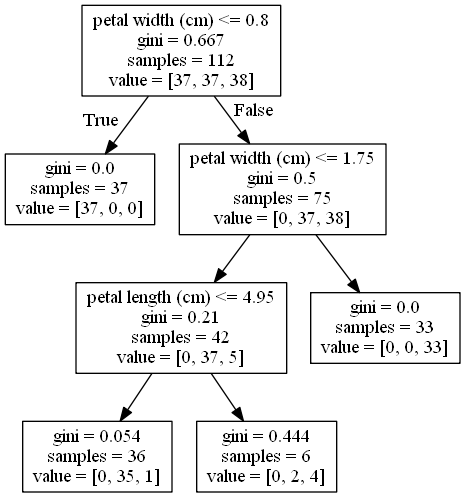

In [61]:
dot = io.StringIO()
export_graphviz(model, out_file=dot, feature_names=iris['feature_names'])
graph = pydot.graph_from_dot_data(dot.getvalue())[0]
image = graph.create_png()
Image(image)

### Naive Bayes (나이브베이즈)
* GaussianNB : 정규분포 나이브베이즈
* BernoulliNB : 베르누이 나이브베이즈
* MultinomialNB : 다항분포 나이브베이즈
* 분포는 독립변수 기준
* 연산속도가 비교적 빠름
* 갯수가 적은 데이터에서 성능 발휘

In [62]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
pred = model.predict(x_valid)
(pred == y_valid).mean()

0.9736842105263158

In [63]:
# 클래스 종류
model.classes_

array([0, 1, 2])

In [64]:
# 클래스별 갯수
model.class_count_

array([37., 37., 38.])

In [66]:
# 클래스 사전확률
model.class_prior_

array([0.33035714, 0.33035714, 0.33928571])

In [67]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(x_train, y_train)
pred = model.predict(x_valid)
(pred == y_valid).mean()

0.3157894736842105

### Perceptron

In [68]:
from sklearn.linear_model import Perceptron
model = Perceptron()
model.fit(x_train, y_train)
pred = model.predict(x_valid)
(pred == y_valid).mean()

0.6578947368421053

In [73]:
# 인공신경망
# 레이어(층)
# Multi Layer Perceptron
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(activation='relu')
model.fit(x_train, y_train)
pred = model.predict(x_valid)
(pred == y_valid).mean()

0.9473684210526315

In [2]:
# 실습
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
df = pd.DataFrame(data=cancer['data'], columns=cancer['feature_names'])
df['target'] = cancer['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [54]:
# 데이터 분리 (학습용, 검증용)
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(
    df.drop('target',1),
    df['target'],
    random_state=32,
    stratify=df['target']
)

In [50]:
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((426, 30), (143, 30), (426,), (143,))

In [12]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_valid)
(pred == y_valid).mean()

0.916083916083916

### 성능평가(분류)

In [13]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [55]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_valid)
(pred == y_valid).mean()

0.9230769230769231

In [56]:
# 혼동행렬 (confusion matrix)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_valid, pred)

array([[49,  4],
       [ 7, 83]], dtype=int64)

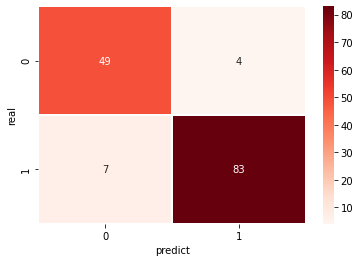

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_valid, pred), annot=True, cmap='Reds', linewidths=1)
plt.xlabel('predict')
plt.ylabel('real')
plt.show()

### precision(정밀도)
* True라고 예측한 것중에 얼마나 잘 맞았는지
* TP / (TP+FP)

In [58]:
from sklearn.metrics import precision_score

In [59]:
precision_score(y_valid, pred)

0.9540229885057471

In [60]:
# 정확도 = (TP+TN) / (TP+FP+TN+FN)

In [61]:
83/87

0.9540229885057471

### recall (재현율, 민감도)
* 실제 True 중에 정확하게 예측한 비율
* TP / (TP+FN)

In [62]:
from sklearn.metrics import recall_score
recall_score(y_valid, pred)

0.9222222222222223

In [63]:
83/90

0.9222222222222223

### f1 score
* 정밀도와 재현율의 조화평균
* 정밀도\*재현율 / (정밀도+재현율)*2

In [64]:
from sklearn.metrics import f1_score
f1_score(y_valid, pred)

0.9378531073446328

### 분류보고서

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        53
           1       0.95      0.92      0.94        90

    accuracy                           0.92       143
   macro avg       0.91      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143



### cross validation (교차 검증)

In [67]:
# k-fold cross-validation
# 5-fold cross-validation > 5개로 나눠서 교차 검증

In [68]:
from sklearn.model_selection import cross_val_score
# 매개변수 (모델객체, 클래스제외한 변수, 클래스, 폴드갯수)
scores = cross_val_score(model, df.drop('target',1), df['target'], cv=5)

In [70]:
scores.mean()

0.915618692749573

In [1]:
!pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582645 sha256=cee231cbc3cc755f255c73118f0ee9cc443735aba98fdb99031936f138a4f64f
  Stored in directory: c:\users\gw024\appdata\local\pip\cache\wheels\87\75\37\404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


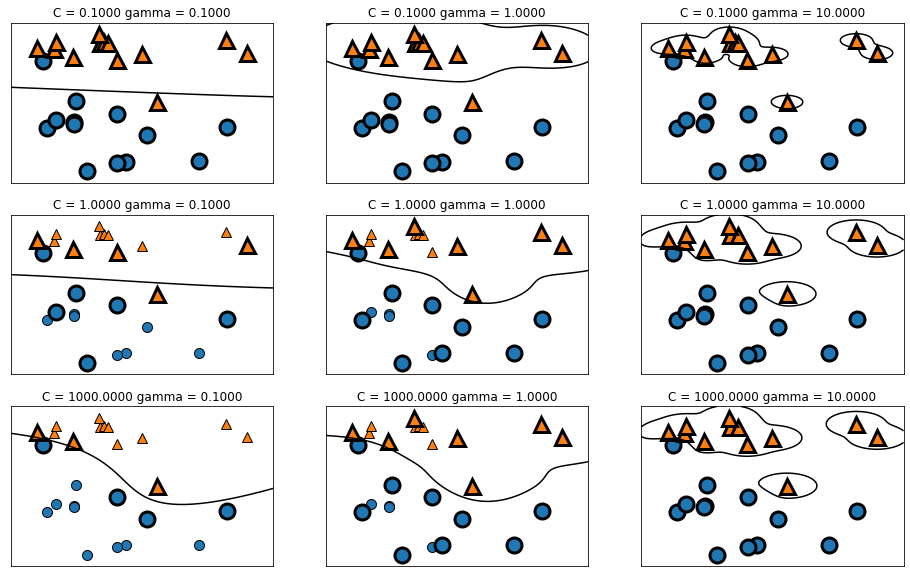

In [75]:
'''
C, gamma 매개변수(하이퍼파라미터)
C : Cost, 규제매개변수
    얼마나 많은 데이터 영역에 다른 분류의 데이터를 넣을 것인지 
    C값이 커질수록 정확히 분류 -> 과적합 가능성 높아짐
gamma : 가우시안 폭의 역수(표준편차), 값이 클수록 과적합 가능성 높아짐
'''
import mglearn

fig, axes = plt.subplots(3,3,figsize=(16,10))

for axe, C in zip(axes, [-1,0,3]):
    for a, gamma in zip(axe, range(-1,2)):
        #print(C, gamma)
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)